In [166]:
from pathlib import Path
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress

In [148]:
# Loading the CSV files from the "resource" folder
import pandas as pd

# Defining the file paths
crashes_file = Path("resources/ardd_fatal_crashes.csv")
fatalities_file = Path("resources/ardd_fatalities.csv")

# Reading the CSV files into Pandas DataFrames
crashes_data = pd.read_csv(crashes_file)
fatalities_data = pd.read_csv(fatalities_file)

C:\Users\athira reji\AppData\Local\Temp\ipykernel_11072\3756945709.py:9: DtypeWarning: Columns (11,12,13,14,15) have mixed types. Specify dtype option on import or set low_memory=False.
  crashes_data = pd.read_csv(crashes_file)
C:\Users\athira reji\AppData\Local\Temp\ipykernel_11072\3756945709.py:10: DtypeWarning: Columns (10,14,15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  fatalities_data = pd.read_csv(fatalities_file)


In [149]:
# Columns to keep
crashes_columns = ['Crash ID','State','Month','Year','Dayweek','Time','Crash Type','Number of Fatalities','Speed Limit','Bus Involvement','Heavy Rigid Truck Involvement','Articulated Truck Involvement','National Remoteness Areas','SA4 Name 2021','National LGA NAme 2021','National Road Type','Christmas Period','Easter Period','Day of week','Time of Day']
fatalities_columns = ['Crash ID','Road User','Gender','Age','Age Group',]

In [150]:
# merging the CSVs
merged_data = pd.merge(crashes_data[crashes_columns], fatalities_data[fatalities_columns], on='Crash ID', how='inner')

In [151]:
# Cleaning data
merged_data['National Road Type'] = merged_data['National Road Type'].str.title()
merged_data['State'] = merged_data['State'].str.upper()

In [152]:
# Displaying the result df
merged_data

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number of Fatalities,Speed Limit,Bus Involvement,...,National LGA NAme 2021,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day,Road User,Gender,Age,Age Group
0,20235016,WA,9,2023,Wednesday,17:10,Single,3,70,No,...,NaN,NaN,No,No,Weekday,Day,Passenger,Male,24,17_to_25
1,20235016,WA,9,2023,Wednesday,17:10,Single,3,70,No,...,NaN,NaN,No,No,Weekday,Day,Driver,Male,24,17_to_25
2,20235016,WA,9,2023,Wednesday,17:10,Single,3,70,No,...,NaN,NaN,No,No,Weekday,Day,Passenger,Male,21,17_to_25
3,20231205,NSW,9,2023,Saturday,0:01,Single,1,100,No,...,Murray River,Arterial Road,No,No,Weekend,Night,Driver,Male,20,17_to_25
4,20233054,QLD,9,2023,Saturday,23:00,Single,1,80,No,...,Gold Coast,Sub-Arterial Road,No,No,Weekend,Night,Driver,Male,25,17_to_25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
55259,19892548,VIC,1,1989,Sunday,1:00,Multiple,1,60,No,...,NaN,NaN,No,No,Weekend,Night,Pedestrian,Male,23,17_to_25
55260,19891122,NSW,1,1989,Tuesday,14:10,Multiple,1,60,No,...,NaN,NaN,No,No,Weekday,Day,Pedestrian,Male,71,65_to_74
55261,19894151,SA,1,1989,Wednesday,11:45,Multiple,1,60,No,...,NaN,NaN,No,No,Weekday,Day,Pedestrian,Male,73,65_to_74
55262,19892576,VIC,1,1989,Friday,17:15,Multiple,1,60,No,...,NaN,NaN,No,No,Weekday,Day,Pedestrian,Female,6,0_to_16


In [153]:
print(merged_data.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55264 entries, 0 to 55263
Data columns (total 24 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Crash ID                       55264 non-null  int64 
 1   State                          55264 non-null  object
 2   Month                          55264 non-null  int64 
 3   Year                           55264 non-null  int64 
 4   Dayweek                        55264 non-null  object
 5   Time                           55212 non-null  object
 6   Crash Type                     55259 non-null  object
 7   Number of Fatalities           55264 non-null  int64 
 8   Speed Limit                    55264 non-null  object
 9   Bus Involvement                55260 non-null  object
 10  Heavy Rigid Truck Involvement  55260 non-null  object
 11  Articulated Truck Involvement  55260 non-null  object
 12  National Remoteness Areas      11371 non-null  object
 13  S

In [154]:
# Dropping data before 2014
data_from_2014 = merged_data.loc[merged_data['Year'] >= 2014]
data_from_2014

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number of Fatalities,Speed Limit,Bus Involvement,...,National LGA NAme 2021,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day,Road User,Gender,Age,Age Group
0,20235016,WA,9,2023,Wednesday,17:10,Single,3,70,No,...,NaN,NaN,No,No,Weekday,Day,Passenger,Male,24,17_to_25
1,20235016,WA,9,2023,Wednesday,17:10,Single,3,70,No,...,NaN,NaN,No,No,Weekday,Day,Driver,Male,24,17_to_25
2,20235016,WA,9,2023,Wednesday,17:10,Single,3,70,No,...,NaN,NaN,No,No,Weekday,Day,Passenger,Male,21,17_to_25
3,20231205,NSW,9,2023,Saturday,0:01,Single,1,100,No,...,Murray River,Arterial Road,No,No,Weekend,Night,Driver,Male,20,17_to_25
4,20233054,QLD,9,2023,Saturday,23:00,Single,1,80,No,...,Gold Coast,Sub-Arterial Road,No,No,Weekend,Night,Driver,Male,25,17_to_25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11542,20145053,WA,1,2014,Monday,0:10,Multiple,1,80,No,...,Cockburn,Arterial Road,No,No,Weekend,Night,Pedestrian,Male,14,0_to_16
11543,20142218,VIC,1,2014,Sunday,23:40,Multiple,3,80,No,...,Unknown,NaN,No,No,Weekend,Night,Passenger,Male,67,65_to_74
11544,20142218,VIC,1,2014,Sunday,23:40,Multiple,3,80,No,...,Unknown,NaN,No,No,Weekend,Night,Pedestrian,Male,45,40_to_64
11545,20142218,VIC,1,2014,Sunday,23:40,Multiple,3,80,No,...,Unknown,NaN,No,No,Weekend,Night,Passenger,Female,58,40_to_64


In [155]:
# Specifying the output folder 
output_folder = "output_folder"

# Creating the output folder 
import os
os.makedirs(output_folder, exist_ok=True)

# Defining the file path for the CSV
output_csv_file = os.path.join(output_folder, "data_from_2014.csv")

# Saving the DataFrame as a CSV file
data_from_2014.to_csv(output_csv_file, index=False)

In [156]:
# Remove duplicate fatalities for the same 'Crash ID' while keeping the first occurrence
fatality_duplicates_dropped = data_from_2014.drop_duplicates(subset='Crash ID', keep='first')
fatality_duplicates_dropped

,Crash ID,State,Month,Year,Dayweek,Time,Crash Type,Number of Fatalities,Speed Limit,Bus Involvement,...,National LGA NAme 2021,National Road Type,Christmas Period,Easter Period,Day of week,Time of Day,Road User,Gender,Age,Age Group
0,20235016,WA,9,2023,Wednesday,17:10,Single,3,70,No,...,NaN,NaN,No,No,Weekday,Day,Passenger,Male,24,17_to_25
3,20231205,NSW,9,2023,Saturday,0:01,Single,1,100,No,...,Murray River,Arterial Road,No,No,Weekend,Night,Driver,Male,20,17_to_25
4,20233054,QLD,9,2023,Saturday,23:00,Single,1,80,No,...,Gold Coast,Sub-Arterial Road,No,No,Weekend,Night,Driver,Male,25,17_to_25
5,20237013,NT,9,2023,Friday,NaN,Multiple,6,-9,No,...,NaN,NaN,No,No,Weekend,Night,Passenger,-9,-9,-9
11,20237008,NT,9,2023,Saturday,NaN,NaN,2,-9,NaN,...,NaN,NaN,No,No,Weekend,Night,Unknown,-9,-9,-9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11540,20141231,NSW,1,2014,Wednesday,13:55,Single,1,60,No,...,Unknown,NaN,No,No,Weekday,Day,Pedestrian,Male,83,75_or_older
11541,20141030,NSW,1,2014,Wednesday,15:45,Single,1,50,Yes,...,Unknown,NaN,No,No,Weekday,Day,Pedestrian,Female,51,40_to_64
11542,20145053,WA,1,2014,Monday,0:10,Multiple,1,80,No,...,Cockburn,Arterial Road,No,No,Weekend,Night,Pedestrian,Male,14,0_to_16
11543,20142218,VIC,1,2014,Sunday,23:40,Multiple,3,80,No,...,Unknown,NaN,No,No,Weekend,Night,Passenger,Male,67,65_to_74


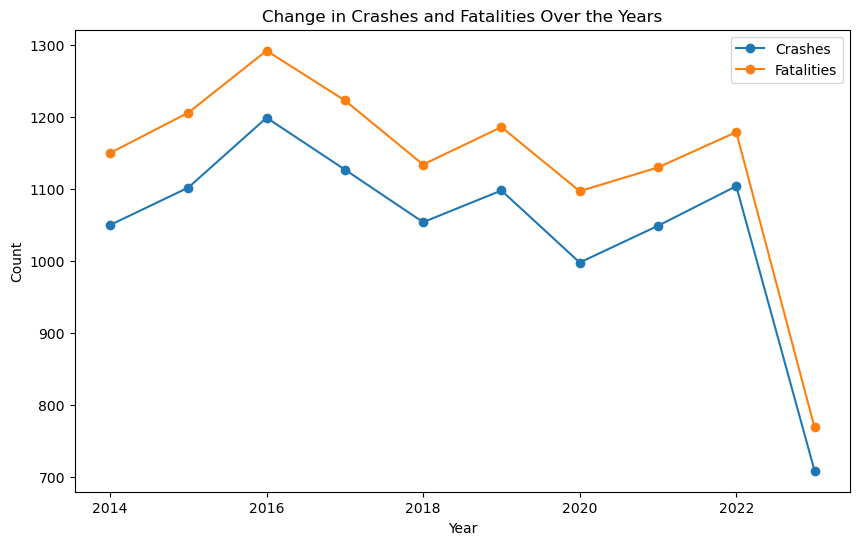

In [174]:
# Group the data by 'Year' and calculate the counts of crashes and sum of fatalities for each year
yearly_stats = df.groupby('Year').agg({'Crash ID': 'count', 'Number of Fatalities': 'sum'})

# Create a line plot to visualize the change over the years
plt.figure(figsize=(10, 6))
plt.plot(yearly_stats.index, yearly_stats['Crash ID'], label='Crashes', marker='o')
plt.plot(yearly_stats.index, yearly_stats['Number of Fatalities'], label='Fatalities', marker='o')

# Set plot labels and title
plt.xlabel('Year')
plt.ylabel('Count')
plt.title('Change in Crashes and Fatalities Over the Years')
plt.legend()

plt.show()

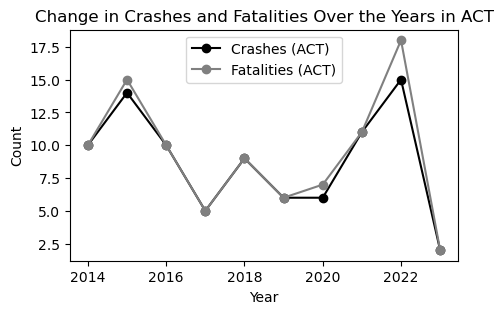

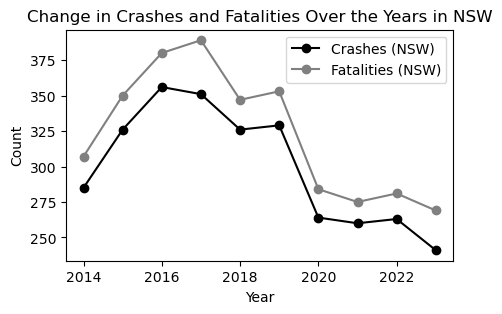

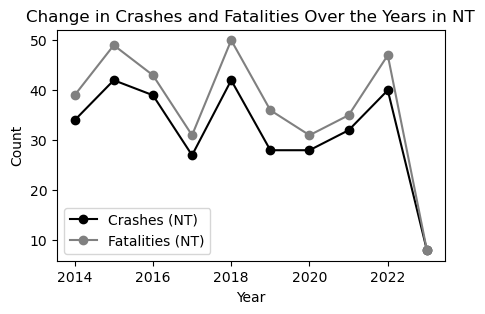

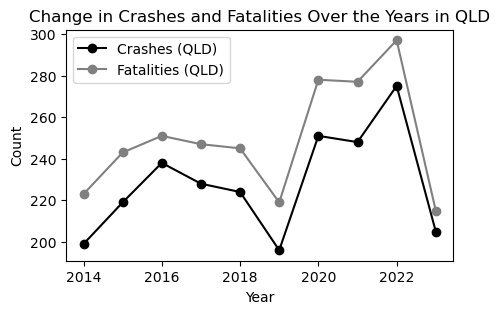

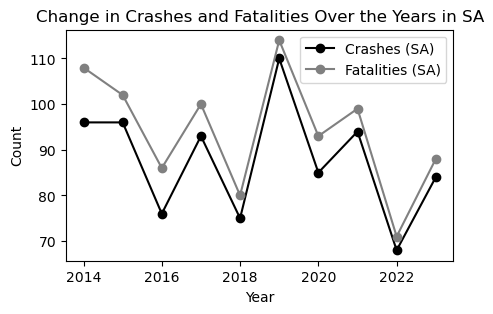

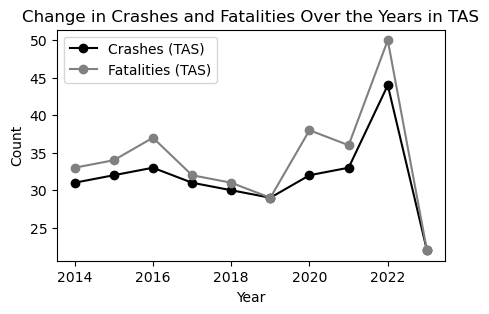

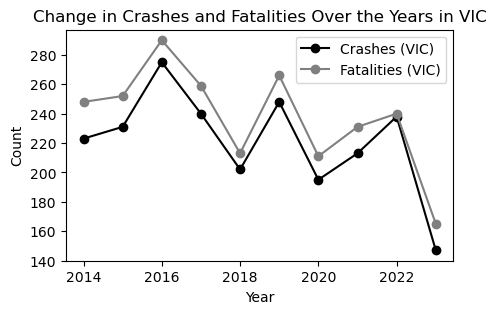

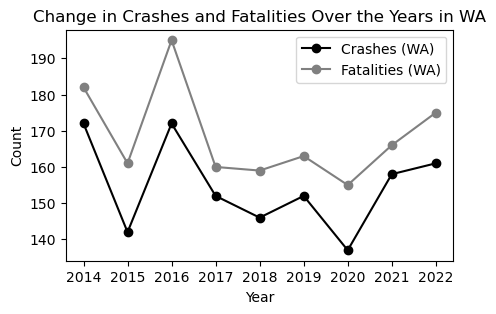

In [181]:
# Assuming you have a DataFrame with 'Year', 'Crash ID', 'Number of Fatalities', and 'State' columns
# Group the data by 'Year', 'State', and calculate the counts of crashes and sum of fatalities for each year and state
yearly_stats = df.groupby(['Year', 'State']).agg({'Crash ID': 'count', 'Number of Fatalities': 'sum'}).unstack()

# Create separate line plots for each state
states = yearly_stats.columns.get_level_values(1).unique()
for state in states:
    plt.figure(figsize=(5, 3))
    plt.plot(yearly_stats.index, yearly_stats['Crash ID', state], label=f'Crashes ({state})', marker='o', color='black')
    plt.plot(yearly_stats.index, yearly_stats['Number of Fatalities', state], label=f'Fatalities ({state})', marker='o',color='grey')

    # Set plot labels and title
    plt.xlabel('Year')
    plt.ylabel('Count')
    plt.title(f'Change in Crashes and Fatalities Over the Years in {state}')
    plt.legend()
    plt.show()

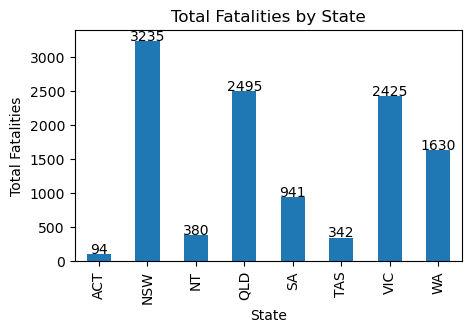

In [182]:
# Group the data by 'State' and calculate the sum of 'Number of Fatalities' in each state
state_fatalities = fatality_duplicates_dropped.groupby('State')['Number of Fatalities'].sum()

# Create a bar chart to visualize the data
ax = state_fatalities.plot(kind='bar', figsize=(5, 3), title='Total Fatalities by State')
plt.xlabel('State')
plt.ylabel('Total Fatalities')

# Add annotations above each bar
for i, v in enumerate(state_fatalities):
    ax.text(i, v + 10, str(v), ha='center')

plt.show()

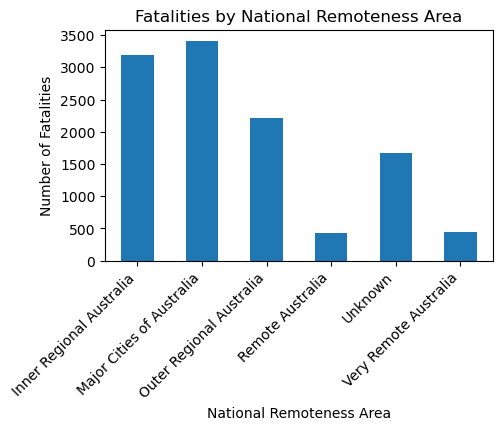

In [183]:
# Group the data by 'National Remoteness Areas' and calculate the sum of 'Number of Fatalities' in each area
fatalities_by_remoteness = fatality_duplicates_dropped.groupby('National Remoteness Areas')['Number of Fatalities'].sum()

# Create a bar chart to visualize the data
fatalities_by_remoteness.plot(kind='bar', figsize=(5, 3), title='Fatalities by National Remoteness Area')
plt.xlabel('National Remoteness Area')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

plt.show()

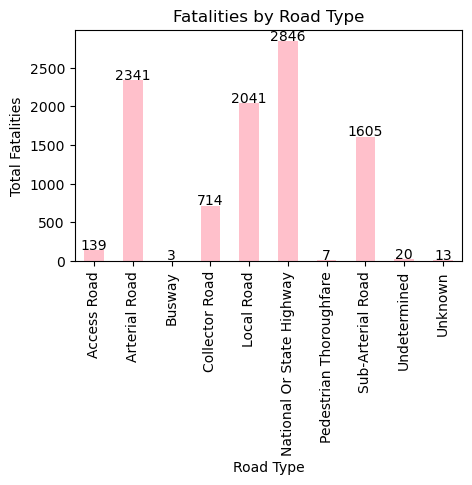

In [184]:
# Group the data by 'National Road Type' and calculate the sum of 'Number of Fatalities' for each road type
road_type_fatalities = fatality_duplicates_dropped.groupby('National Road Type')['Number of Fatalities'].sum()

# Create a bar chart with pink bars
ax = road_type_fatalities.plot(kind='bar',figsize=(5, 3), title='Fatalities by Road Type', color='pink')
plt.xlabel('Road Type')
plt.ylabel('Total Fatalities')
plt.xticks(rotation=90)  # Rotate the x-axis labels for better readability

# Add annotations above each bar
for i, v in enumerate(road_type_fatalities):
    ax.text(i, v + 10, str(v), ha='center')

plt.show()

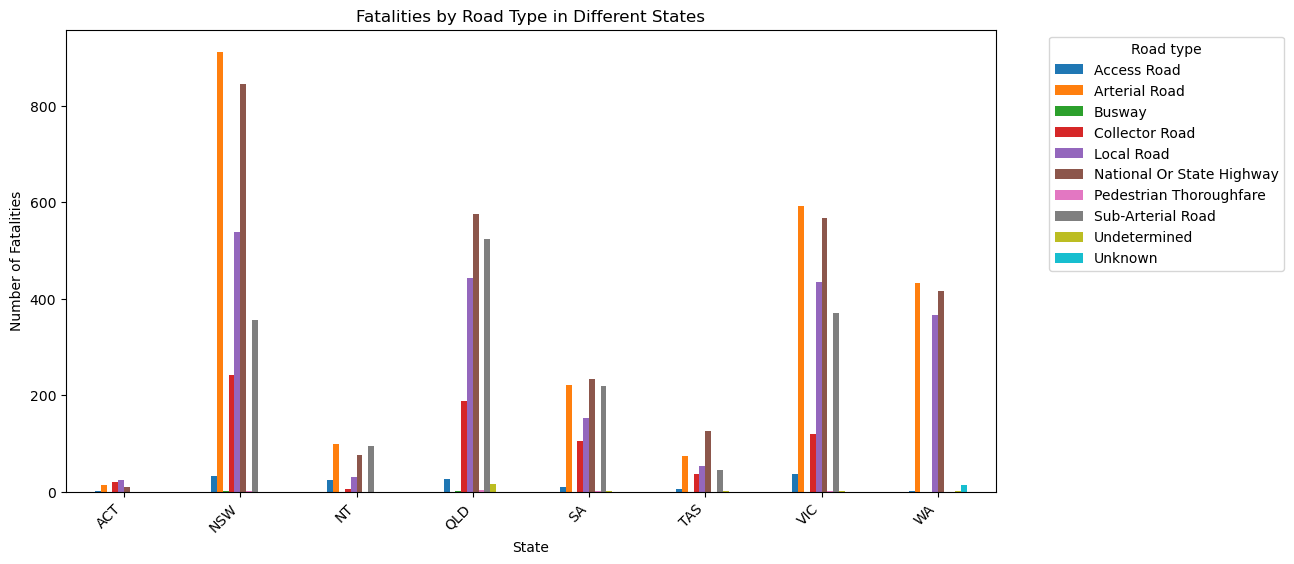

In [197]:
# Group the data by 'State' and 'National Road Type' and calculate the sum of 'Number of Fatalities' in each state and road type
road_type_state_fatalities = df.groupby(['State', 'National Road Type'])['Number of Fatalities'].sum().unstack()

# Create a bar graph for fatalities by road type in different states
road_type_state_fatalities.plot(kind='bar', figsize=(12, 6), stacked=False, title='Fatalities by Road Type in Different States')
plt.xlabel('State')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

# Move the legend outside the plot
plt.legend(title='Road type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

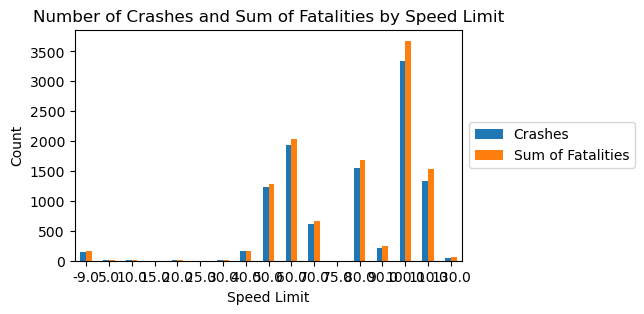

In [196]:
# Group the data by 'Speed Limit' and calculate the count of 'Crash ID' and the sum of 'Number of Fatalities' in each speed limit category
speed_limit_data = fatality_duplicates_dropped.groupby('Speed Limit').agg({'Crash ID': 'count', 'Number of Fatalities': 'sum'})

# Create a grouped bar chart to visualize the data
speed_limit_data.plot(kind='bar', figsize=(5, 3), title='Number of Crashes and Sum of Fatalities by Speed Limit')
plt.xlabel('Speed Limit')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate the x-axis labels for better readability

# Move the legend outside the plot
plt.legend(["Crashes", "Sum of Fatalities"], loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()


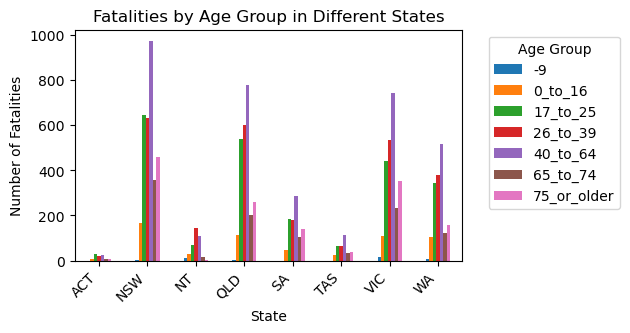

In [190]:
# Group the data by 'State' and 'Age Group' and calculate the sum of 'Number of Fatalities' in each group
fatalities_by_state_age = fatality_duplicates_dropped.groupby(['State', 'Age Group'])['Number of Fatalities'].sum().unstack()

# Create a grouped bar chart to visualize the data
ax = fatalities_by_state_age.plot(kind='bar', figsize=(5, 3), stacked=False, title='Fatalities by Age Group in Different States')
plt.xlabel('State')
plt.ylabel('Number of Fatalities')
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability

# Move the legend outside the plot
plt.legend(title='Age Group', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


C:\Users\athira reji\AppData\Local\Temp\ipykernel_11072\2243370199.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_duplicates_dropped['Speed Limit'] = pd.to_numeric(fatality_duplicates_dropped['Speed Limit'], errors='coerce')
C:\Users\athira reji\AppData\Local\Temp\ipykernel_11072\2243370199.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fatality_duplicates_dropped['Number of Fatalities'] = pd.to_numeric(fatality_duplicates_dropped['Number of Fatalities'], errors='coerce')


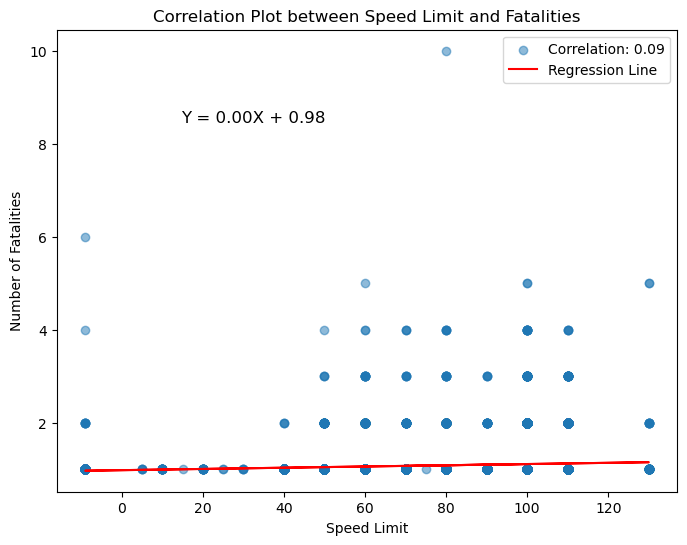

In [191]:
# Ensure the 'Speed Limit' and 'Number of Fatalities' columns are numeric
fatality_duplicates_dropped['Speed Limit'] = pd.to_numeric(fatality_duplicates_dropped['Speed Limit'], errors='coerce')
fatality_duplicates_dropped['Number of Fatalities'] = pd.to_numeric(fatality_duplicates_dropped['Number of Fatalities'], errors='coerce')

# Drop rows with NaN values in 'Speed Limit' or 'Number of Fatalities'
fatality_duplicates_dropped = fatality_duplicates_dropped.dropna(subset=['Speed Limit', 'Number of Fatalities'])

# Extract the numeric data
speed_limit = fatality_duplicates_dropped['Speed Limit']
fatalities = fatality_duplicates_dropped['Number of Fatalities']

# Calculate the correlation coefficient
correlation = np.corrcoef(speed_limit, fatalities)[0, 1]

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = linregress(speed_limit, fatalities)
regression_line = slope * speed_limit + intercept

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(speed_limit, fatalities, label=f'Correlation: {correlation:.2f}', alpha=0.5)

# Plot the regression line
plt.plot(speed_limit, regression_line, color='red', label='Regression Line')

# Display the regression equation
equation = f'Y = {slope:.2f}X + {intercept:.2f}'
plt.annotate(equation, xy=(0.2, 0.8), xycoords='axes fraction', fontsize=12)

plt.title('Correlation Plot between Speed Limit and Fatalities')
plt.xlabel('Speed Limit')
plt.ylabel('Number of Fatalities')
plt.legend()

plt.show()
